In [107]:
#线性回归，又称最小二乘法（ordinary least square，OLS）
#导入数据集拆分工具
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=38)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)
#输出拟合直线的系数和截距
print('直线方程={:.3f}'.format(lr.coef_[0]),'x1+','{:.3f}'.format(lr.coef_[1]),'x2+','{}'.format(lr.intercept_))
#由于有两个特征，每个特征值对应coef_的NumPy数组中的元素

#线性回归的性能表现,查看一下拟合模型的得分
print('训练数据集得分：{:.3f}'.format(lr.score(X_train, y_train)))
print('测试数据集得分：{:.3f}'.format(lr.score(X_test, y_test)))
#能得这么高分其实是没加噪声啦@_@

直线方程=70.386 x1+ 7.432 x2+ -1.4210854715202004e-14
训练数据集得分：1.000
测试数据集得分：1.000


In [108]:
#测试下糖尿病数据集
from sklearn.datasets import load_diabetes
#分别载入数据集的数据和目标分类到X和y
X, y = load_diabetes().data, load_diabetes().target
#将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
#使用线性回归模型进行拟合
lr = LinearRegression().fit(X_train, y_train)

#查看得分
print('训练数据集得分:{:.3f}'.format(lr.score(X_train, y_train)))
print('测试数据集得分:{:.3f}'.format(lr.score(X_test, y_test)))

# 这次模型的分数下降了许多T_T，这是由于实际数据的复杂度比手工合成的数据会高很多，
# 使其表现大幅下降，同时分数差异那么大也说明了标准线性回归出现过拟合的问题。为此需要找一个模型能够控制模型的复杂度，即岭回归

训练数据集得分:0.530
测试数据集得分:0.459


In [109]:
# 使用L2正则化的线性模型——岭回归，一种改良的OLS。
# 这种保留全部特征变量，只改变特征变量的系数值来避免过拟合的方法被称为L2正则化。

#导入岭回归
from sklearn.linear_model import Ridge
#使用岭回归对数据进行拟合
ridge = Ridge().fit(X_train, y_train)
print('训练数据集得分:{:.3f}'.format(ridge.score(X_train, y_train)))
print('测试数据集得分:{:.3f}'.format(ridge.score(X_test, y_test)))

# 可以看到两者都比线性回归得分低，同时这两者得分竟然一致（JOJO哒，这也在你的计算之中吗）。
# 岭回归模型相对线性回归复杂度低，降低过拟合的可能性。
# 同时模型复杂度低，意味着在训练集中表现越差，但模型在泛化方面的表现会更好。


训练数据集得分:0.433
测试数据集得分:0.433


In [110]:
#岭回归是在模型的简单性(使系数coef_趋近于零)和它的训练集上的性能之间实现平衡的一种模型。
#我们可以通过改变模型参数alpha(默认为1)来改变模型复杂度(alpha↑complexity↓generalization↑)和训练集的性能(alpha↑performance↓)。

#我们将alpha值设为10看看效果
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('alpha为1时的训练数据集得分:{:.3f}'.format(ridge10.score(X_train, y_train)))
print('alpha为1时的测试数据集得分:{:.3f}\n'.format(ridge10.score(X_test, y_test)))
#可以看到分数明显下降了，同时可以看到训练数据集比测试数据集分数要高，说明模型出现过拟合的现象了，可以通过升高alpha值来降低过拟合的程度。

#降低alpha值会降低对系数的限制，我们试试将alpha值降到0.1看看，这时候系统接近于线性拟合模型
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('alpha为0.1时的训练数据集得分:{:.3f}'.format(ridge01.score(X_train, y_train)))
print('alpha为0.1时的测试数据集得分:{:.3f}'.format(ridge01.score(X_test, y_test)))

#可以看出alpha值为0.1时的模型比线性回归模型的训练数据集分数低一些，但训练数据集得分却有轻微提升。

alpha为1时的训练数据集得分:0.151
alpha为1时的测试数据集得分:0.162

alpha为0.1时的训练数据集得分:0.522
alpha为0.1时的测试数据集得分:0.473


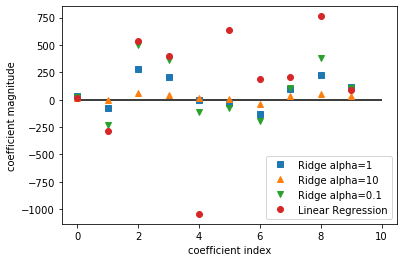

In [111]:
#为了能更直观地查看不同alpha值对应模型的不同之处，可通过matplotlib提供的画图工具显示对应模型的系数coef_。
import matplotlib.pyplot as plt
#绘制alpha=1时模型系数
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
#绘制alpha=10时模型系数
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
#绘制alpha=0.1时模型系数
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
#绘制线性回归模型系数
plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.legend()

# 横坐标是特征变量的序号，纵坐标是特征变量的数量级。
# 当alpha为10时特征变量系数大多在0附近。
# 当alpha为1时，特征变量系数明显增大
# 当alpha为0.1时，特征变量就更大了，而且大部分和线性回归模型的特征变量系数重叠在一起。
# 由于线性回归模型没有进行任何正则化处理，所以有些特征变量系数非常大，都跑到地图外面去了:3


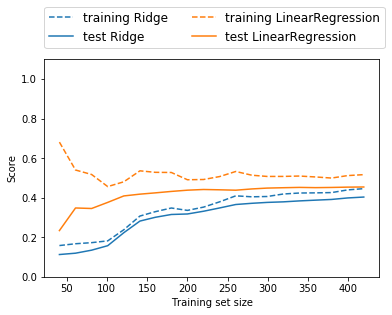

In [112]:
# 另外一个更好理解正则化对模型影响的方法，就是固定alpha值，通过改变样本数量来看模型的评分曲线。
# 使用糖尿病数据进行分析，用这些采样的数据子集对线性回归模型和alpha值固定为1的岭回归模型进行对比。
# 使用matplotlib的pyplot进行绘图，获得一个随数据集大小不断改变的模型评分折线图(也被称为了学习曲线learning curve)
# 导入学习曲线和数据分割方法
from sklearn.model_selection import learning_curve, KFold
#定义一个绘制学习曲线的函数

def plot_learning_curve(est, X_, y_):
#将数据进行20次拆分并对模型进行评分
    training_set_size, train_scores, test_scores = learning_curve(
        est, X_, y_, train_sizes=np.linspace(.1,1,20), 
        cv=KFold(20,shuffle=True,random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training "+estimator_name)
    plt.plot(training_set_size,test_scores.mean(axis=1), '-',
             label='test ' + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)#设置y轴上限

plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=12)

# 可以看出两者的训练集得分都比测试集要高。
# 岭回归训练集和测试集得分差异明显比线性回归的少
# 数据越多，两者得分趋于稳定且持平，说明了在数据量够多的时候，正则化就显得不那么重要了。
# 同时可以看到，数据量越多，线性回归模型的训练集得分呈下降趋势，说明了随着数据增加，线性回归模型就越不容易产生过拟合，或者说越难记住这些数据。

In [113]:
# 使用L1正则化的线性模型————套索回归(lasso)
# 套索回归的原理：和岭回归一样，会将系数限制在非常接近0的范围；
# 但它限制的方式有所不同，它会使部分特征变量的系数等于0，即忽略部分特征变量，这有助于模型突出那些重要的特征变量且更容易理解。

from sklearn.linear_model import Lasso
#使用套索回归拟合数据
lasso = Lasso().fit(X_train, y_train)
print('套索回归的训练数据集得分:{:.3f}'.format(lasso.score(X_train, y_train)))
print('套索回归的测试数据集得分:{:.3f}'.format(lasso.score(X_test, y_test)))
print("套索回归的特征：{}".format(lasso.coef_))
print("套索回归所使用的的特征数：{}".format(np.sum(lasso.coef_!=0)))
# 可以看到，在10个特征中，套索回归只用了3个特征。

套索回归的训练数据集得分:0.362
套索回归的测试数据集得分:0.366
套索回归的特征：[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]
套索回归所使用的的特征数：3


In [114]:
# 套索回归和岭回归一样，有可选参数alpha来确定约束特征变量参数为0的强度
# 可以通过降低alpha值来降低模型欠拟合的程度

# 增大最大迭代(iteration)次数的默认值，否则系统会提示我们增大它的值
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print('套索回归的训练数据集得分:{:.3f}'.format(lasso01.score(X_train, y_train)))
print('套索回归的测试数据集得分:{:.3f}'.format(lasso01.score(X_test, y_test)))
print("套索回归的特征：{}".format(lasso01.coef_))
print("套索回归所使用的的特征数：{}".format(np.sum(lasso01.coef_!=0)))
# 可以看到降低alpha值可以拟合出更复杂的模型，提升训练集和测试集的表现。
# 相比岭回归，套索回归只用了10个特征中的7个，更容易被理解。
# 但同时如果alpha值设得太低，则会大大削弱正则化的效果，会让他表现得和线性回归一样。
# 如下，假如将alpha值设为0.001，会发现它和线性回归拟合的模型相差无几
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('套索回归的训练数据集得分:{:.3f}'.format(lasso00001.score(X_train, y_train)))
print('套索回归的测试数据集得分:{:.3f}'.format(lasso00001.score(X_test, y_test)))
print("套索回归的特征：{}".format(lasso00001.coef_))
print("套索回归所使用的的特征数：{}".format(np.sum(lasso00001.coef_!=0)))

套索回归的训练数据集得分:0.519
套索回归的测试数据集得分:0.480
套索回归的特征：[   0.         -181.40911617  537.71961152  355.19720303 -105.43471481
   -0.         -198.99829878    0.          440.25133426   48.25573121]
套索回归所使用的的特征数：7
套索回归的训练数据集得分:0.530
套索回归的测试数据集得分:0.459
套索回归的特征：[   11.54251003  -282.36842647   534.24367952   401.68387957
 -1036.6100336    629.35844311   182.97157044   203.62513948
   759.907164      91.86890386]
套索回归所使用的的特征数：10


Text(0, 0.5, 'Coefficient magnitude')

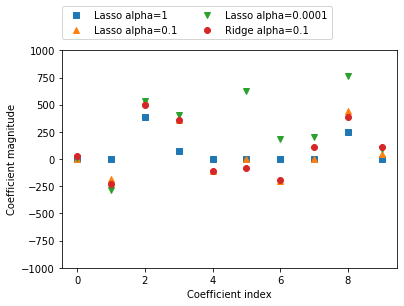

In [115]:
# 套索回归和岭回归的对比
#绘制alpha值为1时的套索回归模型系数图形
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
#绘制alpha值为0.1时的套索回归模型系数图形
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.1")
#绘制alpha值为0.001时的套索回归模型系数图形
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
#绘制alpha值为0.1时的岭回归模型系数图形
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-1000,1000)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
# 可以看到alpha为1时，大部分系数趋于零
# 当alpha为0.1时，趋于零的系数变少
# 当alpha为0.0001时，模型基本没有被正则化，大部分系数都是非零的

#在实践中，岭回归是这两个模型中的优选，但当数据较多，且只想突出其中一部分特征或者让人更容易理解时，套索回归是更好的选择。

#scikit-learn中还提供一种模型，称为弹性网模型(Elastic Net)，它综合套索回归和岭回归的惩罚因子，不过在实际使用中需要调节L1和L2正则化参数。
